In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
n_samples_num = 15000
centers_num = 20

In [ ]:
x, y = make_blobs(n_samples=n_samples_num, n_features=2, centers=centers_num, cluster_std=0.5, shuffle=True, random_state=23)

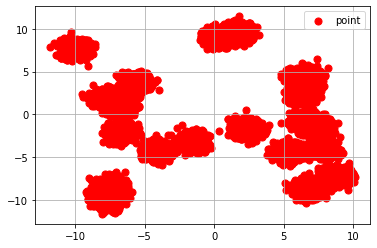

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c='red', marker='o', s=50,label='point')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# 创建起始的质心
centers = []
l = int(len(x)/centers_num)
for center_index in range(centers_num):
  # 根据用户输入的数据随机选择三个质心
  # 我这里通过除法直接计算出随机数据
  # 150 / 3 = 50
  # 0 50 100
  centers.append(x[(center_index)*l])

In [ ]:
centers # 此即为选择的质心

[array([ 7.87749871, -1.36983907]),
 array([ 6.80666169, -1.55852728]),
 array([-9.45939545,  7.40643062]),
 array([6.26900548, 3.93811934]),
 array([-7.67627341, -9.25489249]),
 array([ 7.13226793, -0.27590041]),
 array([-1.73118782, -3.55559917]),
 array([-0.79237783, -3.48565621]),
 array([-7.47536585, -8.18221437]),
 array([0.47225687, 8.80676734]),
 array([-7.01776855,  0.86989226]),
 array([ 7.68394762, -3.86086259]),
 array([ 5.40062614, -4.5389474 ]),
 array([-6.54516193,  1.83912966]),
 array([ 6.04974013, -1.02921244]),
 array([ 8.76838935, -7.68757952]),
 array([-7.16599706, -1.7349384 ]),
 array([-6.1526291 ,  0.81447059]),
 array([-3.57095083, -4.74023415]),
 array([-1.03620442,  8.62461231])]

In [ ]:
# 计算欧式距离
def euclid_distance(point_one,point_two):
  return math.sqrt(math.pow(point_one[0] - point_two[0],2) + math.pow(point_one[1] - point_two[1],2))

# 计算传入的列表中最小值的索引
def get_min_index_of_list(min_list):
  # print(min_list)
  min = 0
  for i in range(len(min_list)):
    if min_list[i]<min_list[min]:
      min = i
  return min

In [ ]:
# 计算点到质心的距离。
# centers代表质心 points代表点
def calc_distance(centers,points):
  # 通过欧式距离计算两个点之间的距离
  global centers_num
  distances = []
  # 创建好列表，存放数据
  for center in range(centers_num):
    distance = []
    distances.append(distance)
    
 # 计算各个点的欧式距离
  for point in points:
    min_list = []
    for center in range(centers_num):
      min_list.append(euclid_distance(point,centers[center]))
    distances[get_min_index_of_list(min_list)].append(point)

  return distances

In [ ]:
def calc_xy_avg(xys):
  l = []
  for i in range(len(xys)):
    x_sum = 0
    y_sum = 0
    for j in xys[i]:
      x_sum = x_sum + j[0]
      y_sum = y_sum + j[1]
    x_sum = x_sum / len(xys[i])
    y_sum = y_sum / len(xys[i])
    l.append((x_sum,y_sum))
  return l

In [ ]:
calc_xy_avg(calc_distance(centers,x))

[(7.773655759202149, -1.4421421621999284),
 (6.957903564314877, -1.515453396565519),
 (-9.959137353252686, 7.67846290081926),
 (6.498484432908539, 3.5057490250411165),
 (-7.725363527725387, -9.774636565681202),
 (6.9080634813507, -0.11298096037713111),
 (-1.8080105630221208, -3.0907314528702154),
 (1.0494404182969688, -2.2017988389525773),
 (-7.374830684929932, -8.224337690775641),
 (1.13220690406888, 9.278878473809899),
 (-7.398528714703153, 1.1092631963545518),
 (7.725479126492757, -4.022792504826566),
 (5.163096918489037, -4.278616314073909),
 (-6.353108387372596, 3.0124030383587685),
 (4.535052529836641, -1.1050499426466798),
 (7.866057015196563, -7.930741848634248),
 (-6.66075457675798, -2.1438184513305485),
 (-6.269002760144314, 0.7547473315027848),
 (-4.099781836833927, -4.238761445613653),
 (-0.5259017662566412, 8.813877237054626)]

完成！


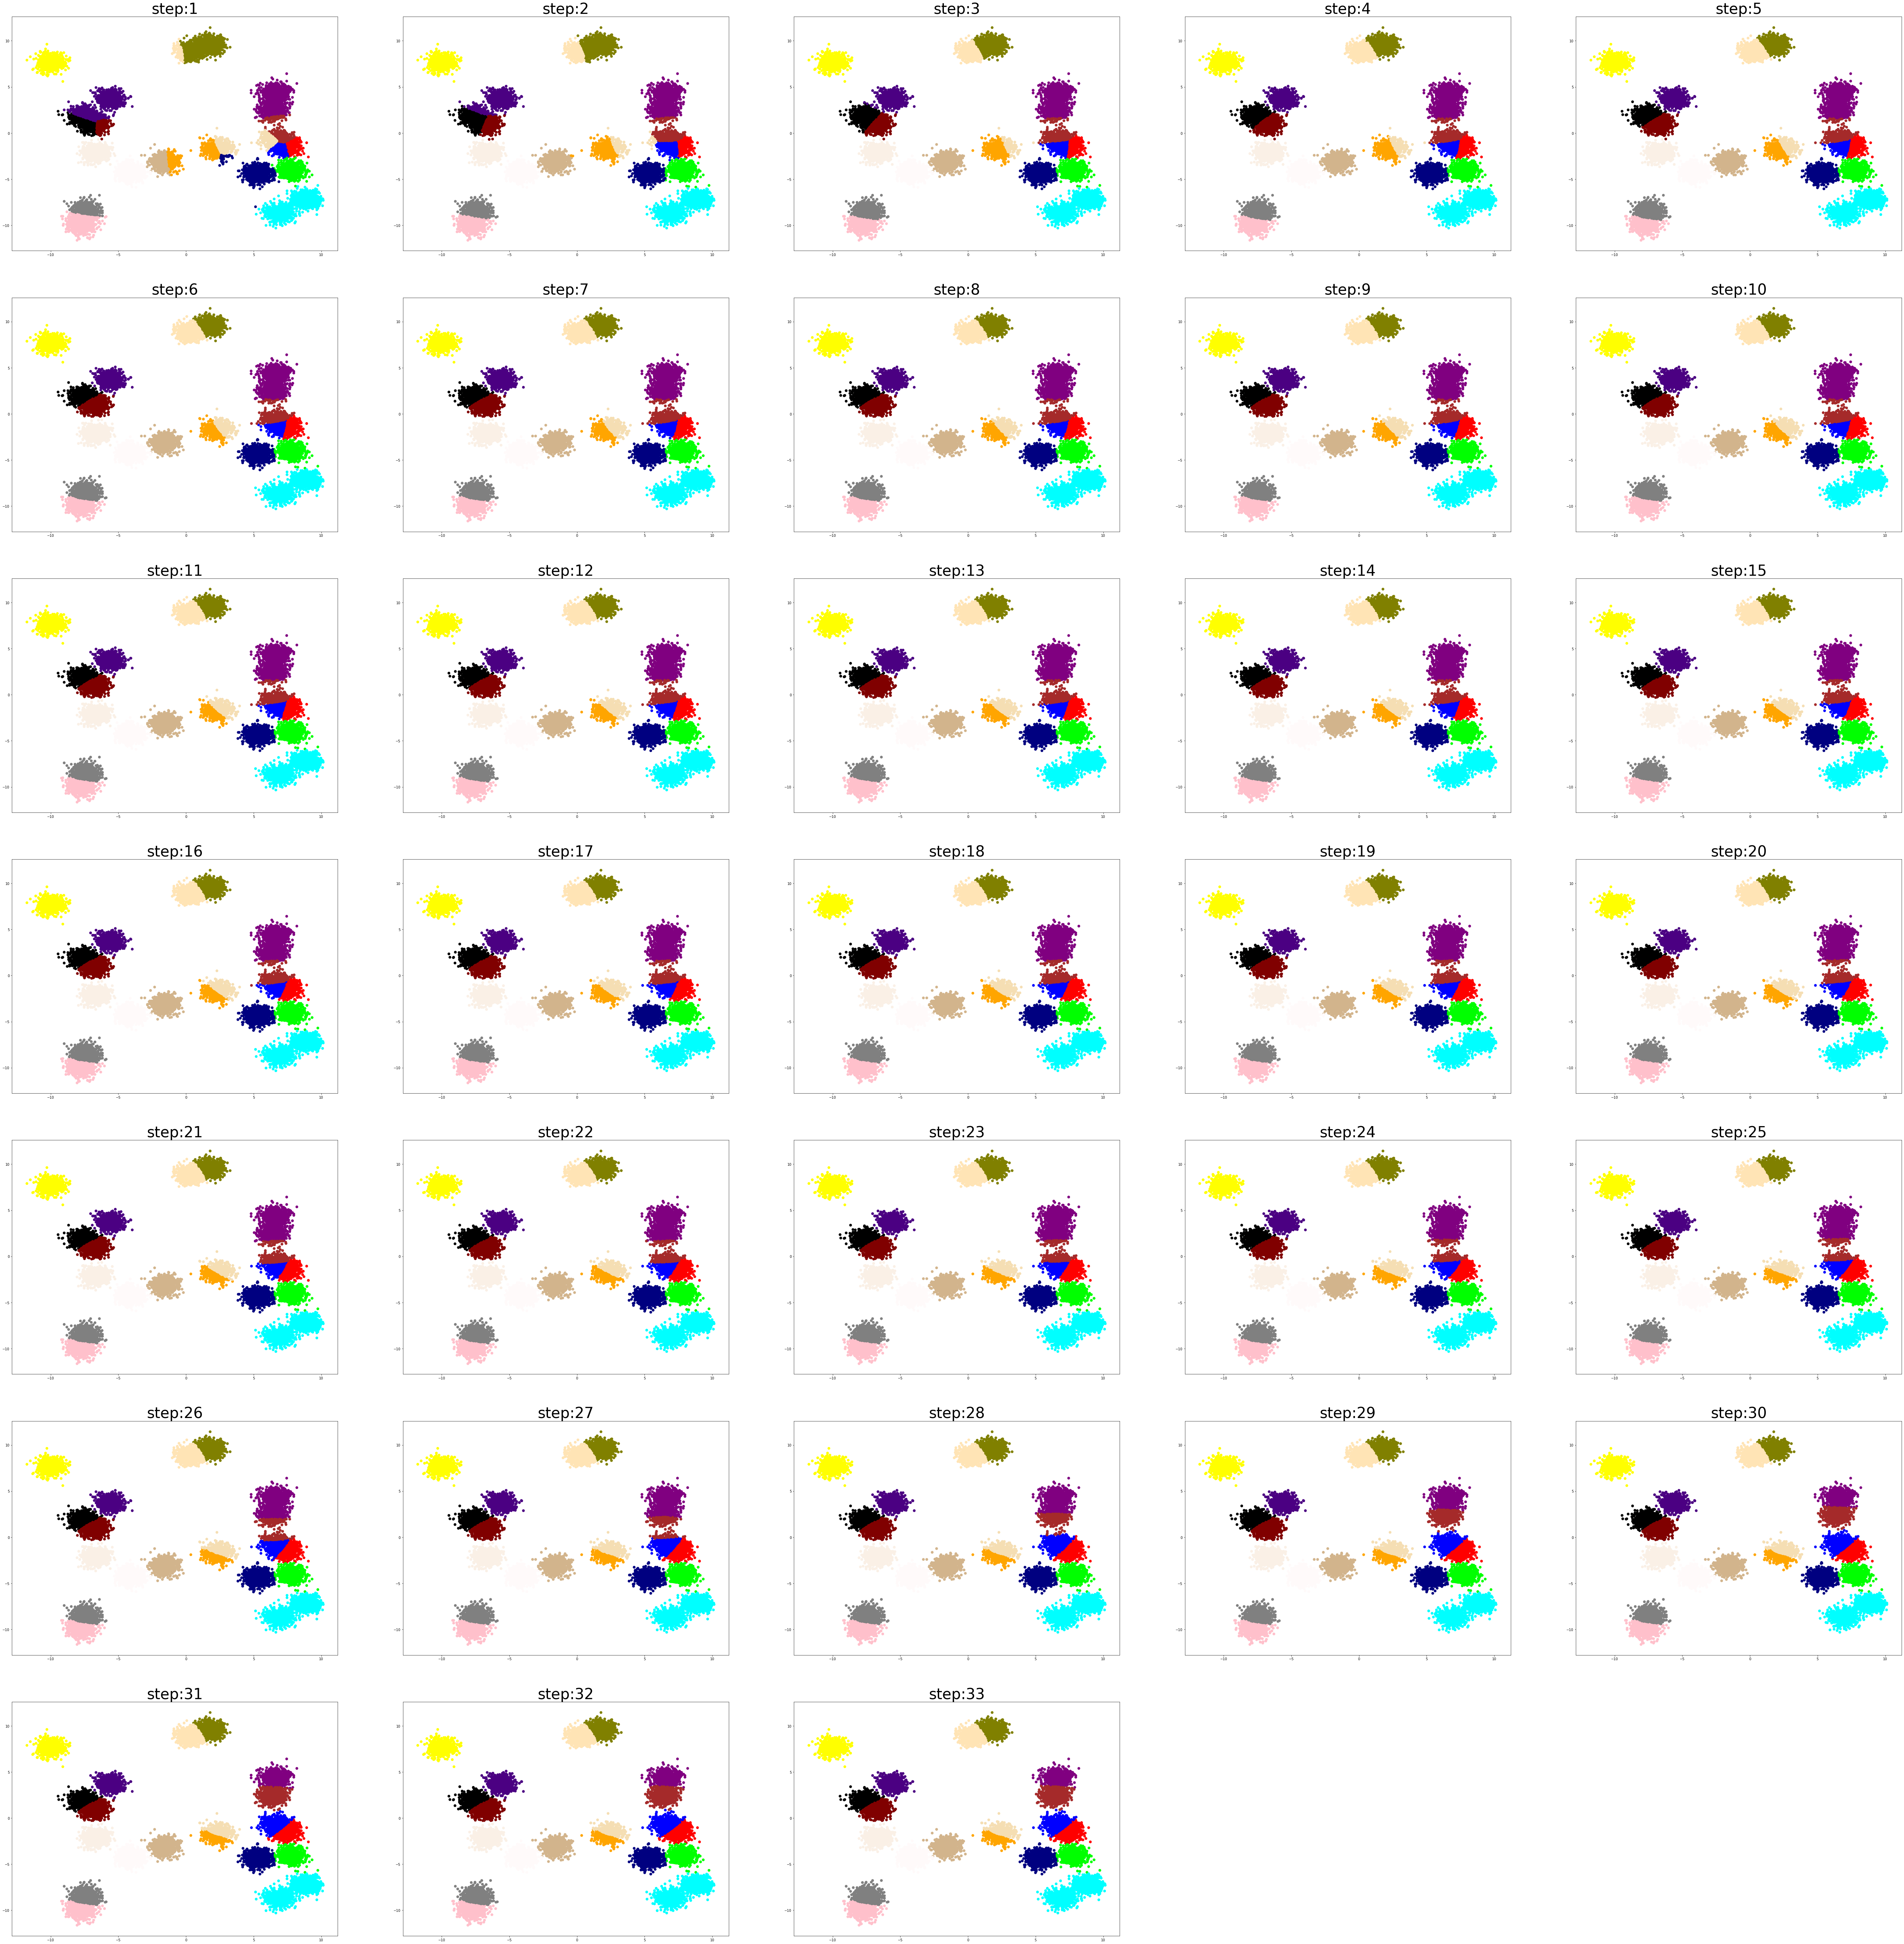

In [ ]:
colors = ['red','blue','yellow','purple','pink','brown','tan','orange','grey','olive','black','lime','navy','indigo','wheat','cyan','linen','maroon','snow','moccasin','slateblue','thistle','plum','drakcyan','honeydew']

# 一行显示五个
row_size = 10
col_size = 5

iterate_index = 1

# 从下面开始执行循环，知道小于一个阈值
flag = True
plt.figure(figsize=(100,150))
while flag:
  global centers
  cd = calc_distance(centers,x)
  # 计算出新的平均数
  cxa = calc_xy_avg(cd)
  correct_num = 0


  #过程可视化代码
  plt.subplot(row_size,col_size,iterate_index)
  iterate_index = iterate_index + 1
  for i in range(len(cd)):
    arr = np.array(cd[i])
    plt.scatter(arr[:, 0], arr[:, 1], c=colors[i], marker='o', s=50,label=str(i))
    # plt.legend(fontsize=40,title_fontsize=40)
    plt.title('step:%s'%(iterate_index-1),fontdict={'weight':'normal','size': 44})
  #过程可视化代码

  # 计算原始centers和cxa之间的距离，如果小于某一个值就认为结束了。
  for i in range(len(centers)):
    if euclid_distance(centers[i],cxa[i]) < 0.01:
      correct_num = correct_num + 1
  if correct_num == len(centers):
    flag = False
  else:
    centers = cxa

# 代表当前的族群
group = cd
print("完成！")
# print(centers)
# print(group)
# plt.legend(fontsize=40,title_fontsize=40)
plt.show()
# plt.plot()
# plt.subplot(10,10,1)

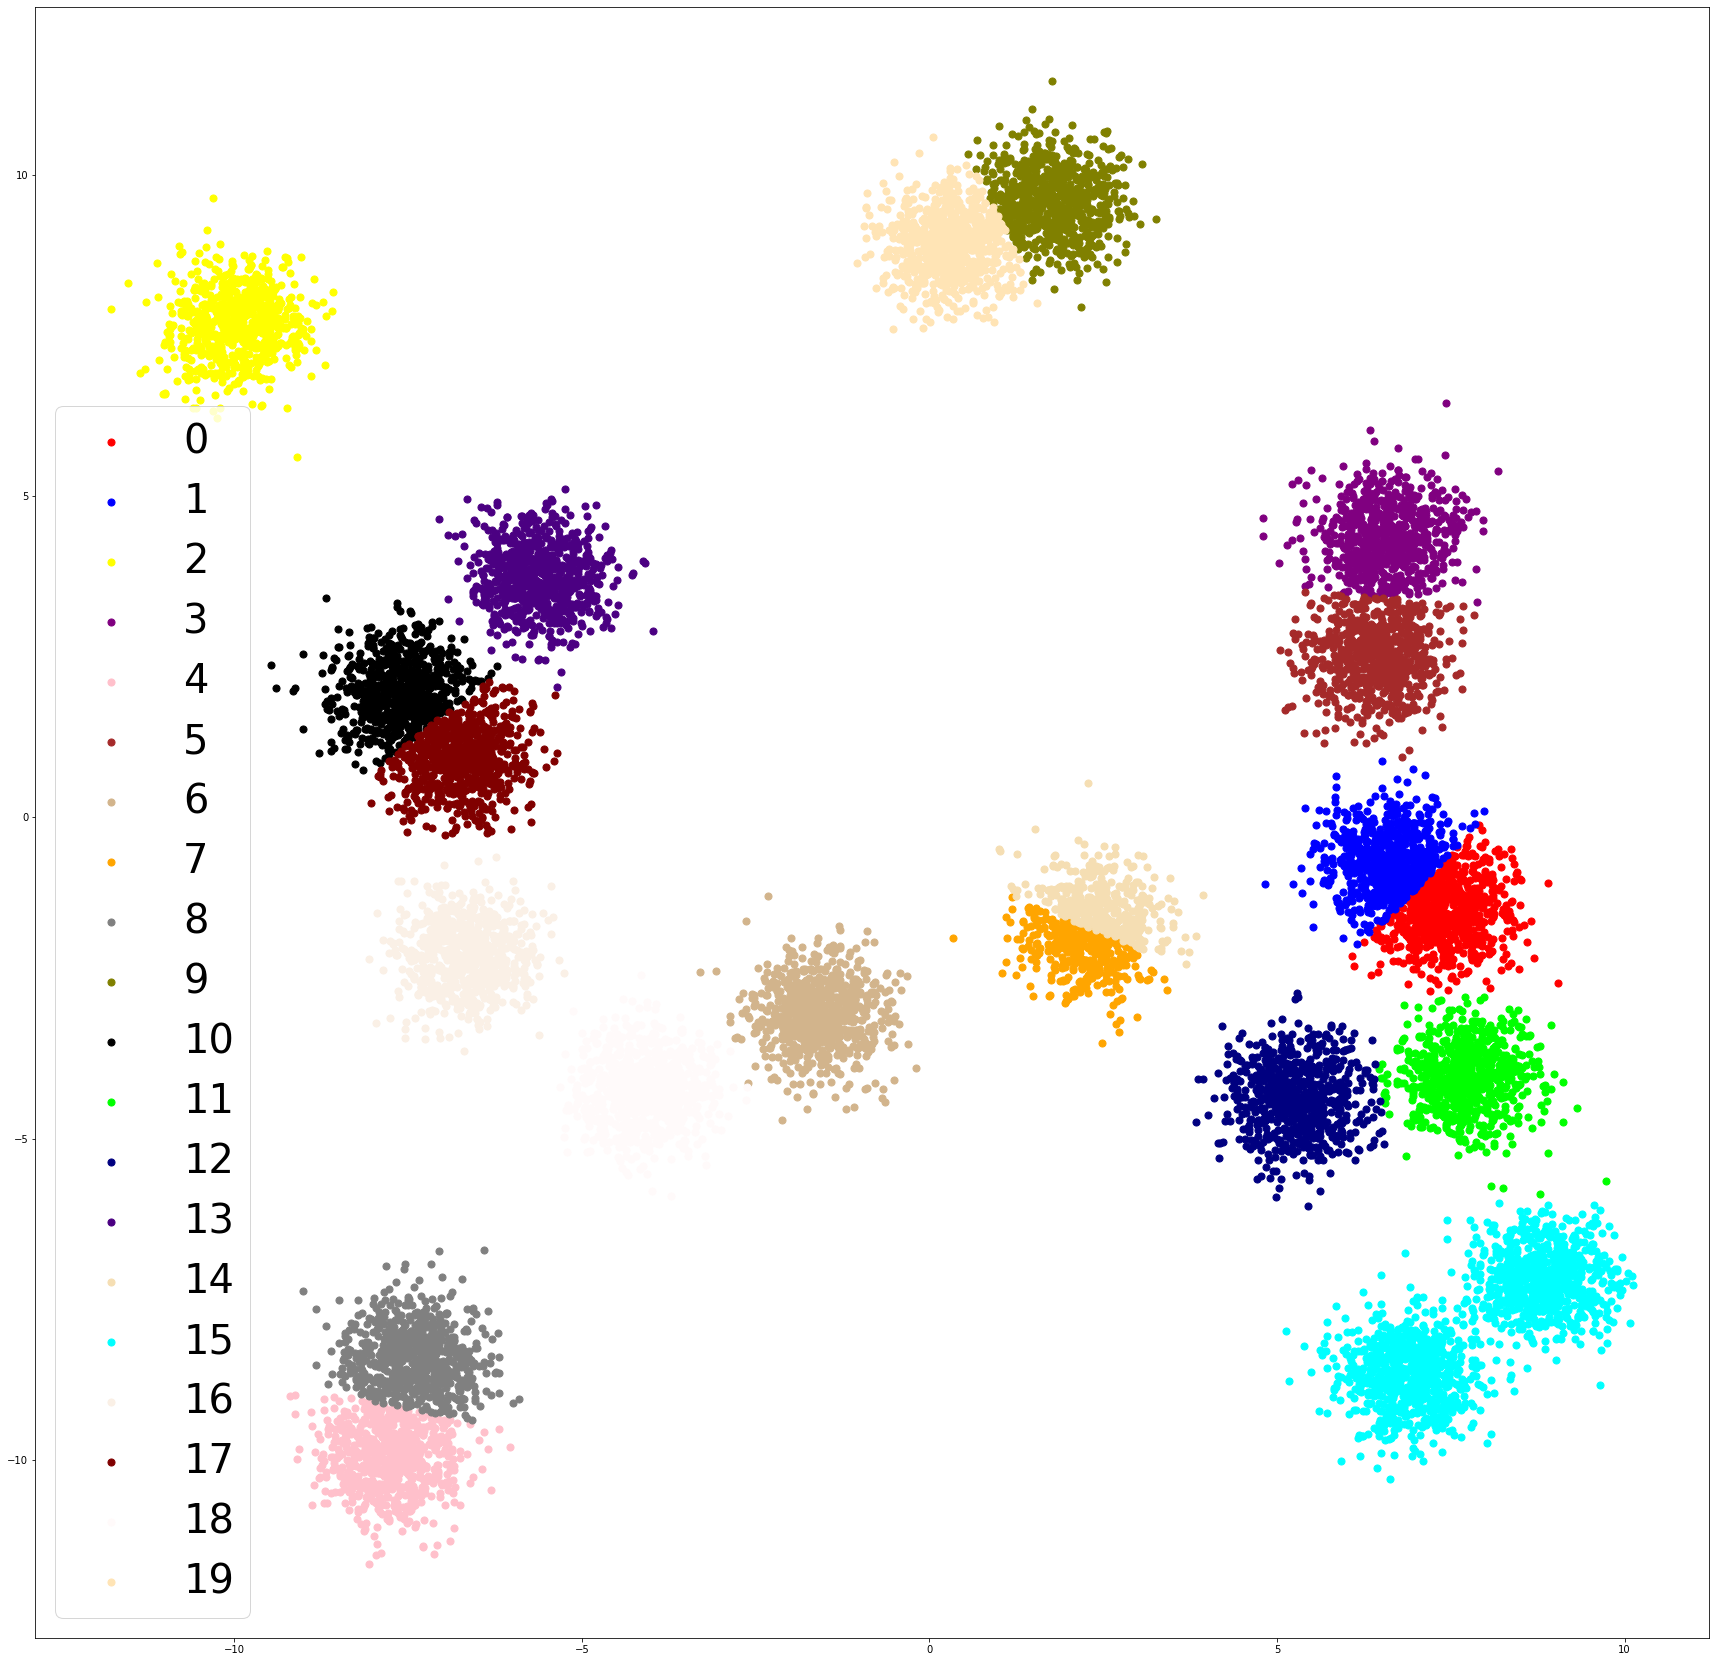

In [ ]:
# 单独的结果输出
plt.figure(figsize=(30,30))
colors = ['red','blue','yellow','purple','pink','brown','tan','orange','grey','olive','black','lime','navy','indigo','wheat','cyan','linen','maroon','snow','moccasin','slateblue','thistle','plum','drakcyan','honeydew']
for i in range(len(group)):
  arr = np.array(group[i])
  plt.scatter(arr[:, 0], arr[:, 1], c=colors[i], marker='o', s=50,label=str(i))
plt.legend(fontsize=40,title_fontsize=40)
plt.show()